# <a id='toc1_'></a>[Loan Default Prediction (EDA)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Loan Default Prediction (EDA)](#toc1_)    
  - [Libraries](#toc1_1_)    
    - [Global preferences](#toc1_1_1_)    
  - [Functions](#toc1_2_)    
  - [Read data](#toc1_3_)    
  - [EDA](#toc1_4_)    
    - [Nulls](#toc1_4_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Libraries](#toc0_)

In [67]:
# Basic python
import re

# Data manipulation
import polars as pl

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno


### <a id='toc1_1_1_'></a>[Global preferences](#toc0_)

In [63]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (18,10)

## <a id='toc1_2_'></a>[Functions](#toc0_)

In [ ]:
# Regex helper functions
def get_similar_variables(df_: pl.DataFrame, kword_:str)-> list:
    """
    Searches column names containing an specific keyword.

    Parameters:
    -----------

        df_: pl.DataFrame
            Target polars dataframe

        kword_: str
            Keyword used to search for similar variables.

    Returns:
    -------

        List of all matching variables names given a keyword.

    """

    vars = df_.columns
    reg = re.compile(f"[\s\S]*{kword_}[\s\S]*")

    return [reg.search(i).group() for i in vars if reg.search(i) != None ]




## <a id='toc1_3_'></a>[Read data](#toc0_)

In [105]:
# Define file path
path = "../data/raw/"
raw_file = "definitely_not_from_kaggle_loan_default_dataset.csv"

In [106]:
# Read data
df = pl.read_csv(path + raw_file)

In [13]:
df.head(3)

uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,billing_pattern_03_last_12_months_mean,…,activity_pattern_14_last_12_months_mean,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation
str,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""ab5191f0-5bf7-48d7-b52b-046316…","""2022-04-29""",1.0,1999.0,"""2019-03-01""","""REGION_5""","""TYPE_2""",-184.249,22.0,-224.048,-27.9704,-104.1362,-180.4017,12.7514,234.0074,-414.8524,null,null,-198.5122,-14.5693,254.6177,null,130.2402,null,-172.1113,-67.5607,24.5808,28.0,null,-270.9978,-361.9366,116.7504,-55.6501,154.7281,312.7052,-64.8508,151.8844,…,-134.2671,177.1795,244.5875,3.7521,null,-5.4105,-151.4378,94.8894,-303.3621,-15.1243,-99.0,348.433,-91.2841,null,-252.5821,-35.0847,415.4933,1140.2032,93.1231,null,-299.9051,309.5891,-411.5654,-115.208,89.8558,-382.5563,-281.5171,-115.3785,150.4016,-250.0021,-727.2061,-410.8231,-107.3805,85.0,-19.0,-

In [104]:
# Total of date variables
get_similar_variables(df, "date")

['credit_application_date', 'activity_date_36_month_1_no_aggregation']

In [107]:
# count of common variables

common = re.compile("([a-z\_]+)(_[\d]+)")

base_name_counter = {}
for i in df.columns:
    try:
        base_name = common.search(i).group(1)

    except:
        base_name = i
    
    if base_name in base_name_counter.keys():
        base_name_counter[base_name] +=1

    else:
        base_name_counter[base_name] = 1


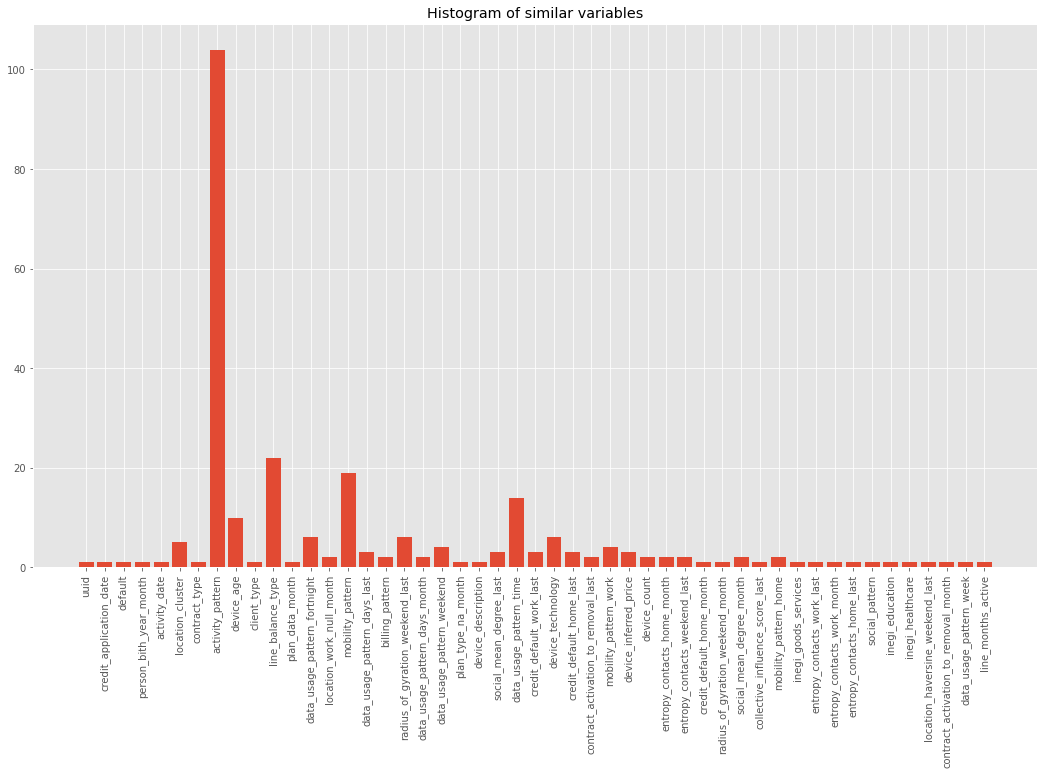

In [110]:
# Show total of variables grouped by similar names
plt.bar(base_name_counter.keys(), base_name_counter.values());
plt.title("Histogram of similar variables")
plt.xticks(rotation=90);

In [75]:
# Count total of diferent dtypes
dict((x,df.dtypes.count(x)) for x in set(df.dtypes))

{Float64: 252, String: 5}

In [70]:
# Brief polars description of data
df.describe()

statistic,uuid,credit_application_date,default,person_bith_year_month_1_no_aggregation,activity_date_36_month_1_no_aggregation,location_cluster_03_month_1_most_frequent,contract_type_1_month_1_no_aggregation,activity_pattern_35_month_1_no_aggregation,activity_pattern_34_month_12_no_aggregation,activity_pattern_17_month_12_no_aggregation,activity_pattern_02_month_12_no_aggregation,device_age_2_month_1_social_mean,activity_pattern_09_last_12_months_max,client_type_1_month_9_no_aggregation,activity_pattern_07_last_9_months_max,activity_pattern_07_last_12_months_max,line_balance_type_11_last_12_months_max,line_balance_type_09_last_9_months_mean,activity_pattern_21_weekend_month_12_no_aggregation,activity_pattern_09_last_6_months_max,activity_pattern_09_last_9_months_max,line_balance_type_09_last_12_months_mean,activity_pattern_17_month_9_no_aggregation,line_balance_type_01_last_3_months_min,plan_data_month_12_no_aggregation,activity_pattern_25_last_12_months_min,data_usage_pattern_fortnight_1_last_12_months_max,location_work_null_month_9_no_aggregation,line_balance_type_01_last_6_months_min,activity_pattern_21_weekdaynight_month_12_no_aggregation,activity_pattern_03_weekend_month_6_no_aggregation,activity_pattern_25_last_9_months_min,mobility_pattern_03_last_3_months_mean,data_usage_pattern_days_last_6_months_min,activity_pattern_02_month_1_no_aggregation,activity_pattern_02_last_12_months_mean,…,activity_pattern_14_last_12_months_mean,activity_pattern_12_last_12_months_mean,activity_pattern_05_weekdaylight_last_3_months_mean,activity_pattern_14_last_9_months_mean,device_age_3_month_12_no_aggregation,credit_default_home_last_12_months_min,activity_pattern_14_last_6_months_max,device_technology_2_month_1_no_aggregation,activity_pattern_11_month_12_no_aggregation,device_count_1_month_1_no_aggregation,activity_pattern_27_last_9_months_mean,activity_pattern_21_weekdaynight_last_12_months_max,data_usage_pattern_time_8_month_1_social_min,line_balance_type_04_last_6_months_max,mobility_pattern_05_month_6_no_aggregation,data_usage_pattern_time_5_month_1_social_mean,data_usage_pattern_week_1_last_9_months_mean,location_cluster_02_month_9_no_aggregation,credit_default_work_last_6_months_mean,line_balance_type_07_last_9_months_min,data_usage_pattern_fortnight_1_last_9_months_mean,activity_pattern_11_last_9_months_max,activity_pattern_10_month_6_no_aggregation,activity_pattern_10_month_9_no_aggregation,line_months_active_2_last_12_months_mean,data_usage_pattern_days_last_3_months_mean,activity_pattern_10_weekend_last_3_months_mean,data_usage_pattern_fortnight_4_last_6_months_max,activity_pattern_11_weekdaylight_month_1_no_aggregation,activity_pattern_21_weekdaylight_last_12_months_max,location_cluster_02_month_1_no_aggregation,activity_pattern_22_weekend_last_3_months_min,mobility_pattern_05_last_6_months_min,activity_pattern_08_last_9_months_min,activity_pattern_28_last_3_months_mean,device_age_2_month_6_no_aggregation,activity_pattern_11_weekdaynight_month_9_no_aggregation
str,str,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""25000""","""25000""",19722.0,5621.0,"""22716""","""22507""","""16016""",22713.0,19584.0,19186.0,18790.0,21445.0,23350.0,5105.0,20254.0,20914.0,10546.0,10202.0,18790.0,23108.0,23238.0,10546.0,19959.0,9129.0,5279.0,23470.0,14321.0,20380.0,9796.0,18790.0,20469.0,23348.0,13498.0,13975.0,22386.0,23350.0,…,23139.0,23350.0,22837.0,23029.0,10482.0,14267.0,22919.0,16141.0,18790.0,13074.0,23238.0,23350.0,21549.0,4472.0,12243.0,21507.0,14227.0,19699.0,13772.0,10202.0,14063.0,23238.0,20469.0,19635.0,11866.0,13593.0,22837.0,13886.0,22386.0,23350.0,22507.0,22837.0,13859.0,23238.0,17072.0,11693.0,19635.0
"""null_count""","""0""","""0""",5278.0,19379.0,"""2284""","""2493""","""898

In [ ]:
# Count all null values for each variable
nulls = df.describe()\
            .filter(pl.col("statistic").is_in(["count","null_count"]))\
                .transpose(include_header=True, header_name="col_name", column_names=["count","null_count"])\
                    .filter(pl.col("col_name") != "statistic")\
                        .cast({"null_count": pl.Float32 })\
                            .with_columns((pl.col("null_count")/pl.lit(df.shape[0])).alias("null_percentage"))
nulls

col_name,count,null_count,null_percentage
str,str,f32,f32
"""uuid""","""25000""",0.0,0.0
"""credit_application_date""","""25000""",0.0,0.0
"""default""","""19722.0""",5278.0,0.21112
"""person_bith_year_month_1_no_ag…","""5621.0""",19379.0,0.77516
"""activity_date_36_month_1_no_ag…","""22716""",2284.0,0.09136
…,…,…,…
"""mobility_pattern_05_last_6_mon…","""13859.0""",11141.0,0.44564
"""activity_pattern_08_last_9_mon…","""23238.0""",1762.0,0.07048
"""activity_pattern_28_last_3_mon…","""17072.0""",7928.0,0.31712


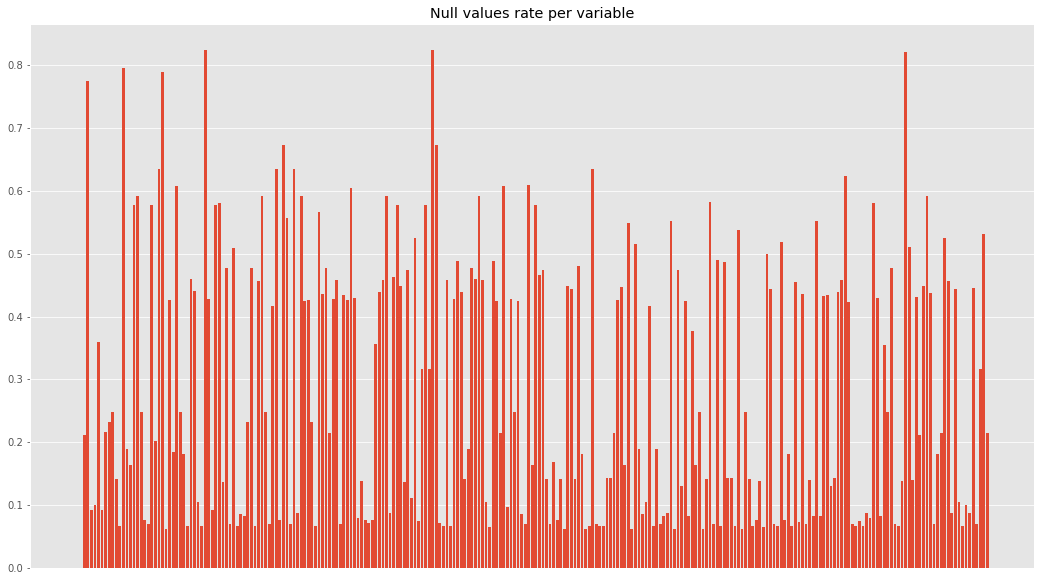

In [112]:
# Show completeness of the data
plt.bar(nulls["col_name"], nulls["null_percentage"]);
plt.title("Null values rate per variable")
plt.xticks([],rotation=90);

In [85]:
df.shape[0]

25000

## <a id='toc1_4_'></a>[EDA](#toc0_)

### <a id='toc1_4_1_'></a>[Nulls](#toc0_)